In [1]:
import skimage.io as skio
imstack1 = skio.imread("/content/LC08_L2SP_144045_20220422_20220428_02_T1_SR_B6.TIF", plugin="tifffile")

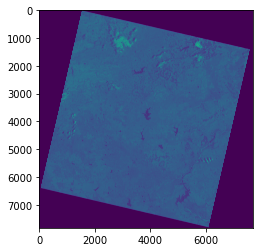

In [2]:
import matplotlib.pyplot as plt
plt.imshow(imstack1)

In [3]:
print("The mean of the TIFF stack (whole stack!) is:")
print( imstack1.mean())

The mean of the TIFF stack (whole stack!) is:
11290.758577564646


In [4]:
for i in imstack1[5000]:
  print(i)

Streaming output truncated to the last 5000 lines.
16141
16086
16039
16649
16658
16504
16354
16598
16411
16358
16107
16171
16210
16675
16187
16160
16055
16002
15716
15066
15038
15163
14848
14863
15367
15380
15425
15804
15849
15804
15679
15546
15264
16021
16372
16132
16705
16949
17107
17107
17012
17058
17095
16663
16141
15998
15845
16201
16519
16398
16444
16331
15974
16087
16247
16132
15409
14022
14047
15271
16496
15799
14818
14203
14045
14458
14898
15498
15797
15746
15598
15244
14870
14801
14856
14940
14967
14976
15359
15394
14617
14390
14400
14429
14447
14550
14702
14876
15095
16197
16894
16583
16306
16130
16058
15981
15406
14400
14061
14193
14292
14464
14940
15477
15145
14543
14366
14070
13953
14159
14165
13994
14050
14196
14540
14587
14414
14237
14434
14637
14635
14500
14616
14418
14123
13822
14312
14278
14649
15344
15726
15560
15661
15740
16236
16303
16260
16274
16106
15904
16018
16312
16554
16266
15987
15959
16424
16457
16898
16149
15161
15419
15073
15122
15605
16790
17023
16923
1

In [5]:
!pip install rasterio
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 564 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy as np
import rasterio as rio
import tifffile as tiff
from patchify import patchify
from rasterio.plot import show

In [10]:
IMG_PATH = '/content/LC08_L2SP_144045_20220422_20220428_02_T1_SR_B6.TIF'
OUT_PATH = '/content/patches'

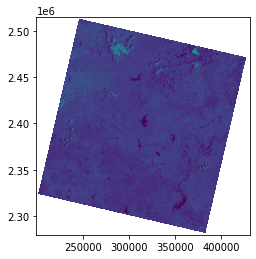

In [16]:
imge = rio.open('/content/LC08_L2SP_144045_20220422_20220428_02_T1_SR_B6.TIF')
show(imge) # plot raster

In [17]:
img_array = imge.read()
print(img_array.shape)

(1, 7831, 7681)


In [23]:
img_array = imge.read()
print(img_array.shape)

(1, 7831, 7681)


In [26]:

img_array = np.moveaxis(img_array, 0, 2) # move bands to the last dimension of the array
print(img_array.shape)

(7831, 7681, 1)


In [27]:
PATCH_SIZE = 256
PATCH_STEP = 256

In [33]:
# Create patches of [256 pixels in X, 256 pixels in Y, 1 band] and no pixel overlapping
patches = patchify(img_array,(PATCH_SIZE, PATCH_SIZE,1), step=PATCH_STEP)
print(patches.shape)

(30, 30, 1, 256, 256, 1)


In [35]:
for x in range(patches.shape[0]):
    for y in range(patches.shape[1]):
            single_patch = patches[x,y,:,:,:]
            tiff.imwrite(OUT_PATH + 'Image_' + str(x) + '_' + str(y) + ".tiff", single_patch)